<a href="https://colab.research.google.com/github/MachineLearningWithHuman/cloud/blob/master/Linear_regression_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

# <b>Assumptions in Linear Regression</b>


*   **Linear relationship.**It is also important to check for outliers since linear regression is sensitive to outlier effects.  The linearity assumption can best be tested with scatter plots.
![alt text](https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2F2.bp.blogspot.com%2F-TcRUfR96Flw%2FUBhSO2LK9CI%2FAAAAAAAAAgY%2FI40YLjWavIs%2Fs1600%2Flinear%2Bvs%2Bnonlinear.jpg&f=1&nofb=1)
*   **Multivariate normality.**This assumption can best be checked with a histogram or a Q-Q-Plot.  Normality can be checked with a goodness of fit test, e.g., the Kolmogorov-Smirnov test.  When the data is not normally distributed a non-linear transformation (e.g., log-transformation) might fix this issue.
![alt text](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.gya82KlV8aRluXMS8OCOOAAAAA%26pid%3DApi&f=1)
*   **No or little multicollinearity.**Multicollinearity occurs when the independent variables are too highly correlated with each other.
![alt text](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.stack.imgur.com%2FJfCrn.jpg&f=1&nofb=1)
Multicollinearity may be tested with three central criteria:

1.    **Correlation matrix** – when computing the matrix of Pearson’s Bivariate Correlation among all independent variables the correlation coefficients need to be smaller than 1.
2.   **Tolerance –**the tolerance measures the influence of one independent variable on all other independent variables; the tolerance is calculated with an initial linear regression analysis.  Tolerance is defined as **T = 1 – R²** for these first step regression analysis.  With T < 0.1 there might be multicollinearity in the data and with T < 0.01 there certainly is.
3.  **Variance Inflation Factor (VIF) –** the variance inflation factor of the linear regression is defined as VIF = 1/T. With VIF > 5 there is an indication that multicollinearity may be present; with VIF > 10 there is certainly multicollinearity among the variables.
*   No auto-correlation
*   Homoscedasticity (static variance)








In [0]:
import numpy as np

#create data for regression
x_values = np.arange(10)
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)


In [0]:
import torch
from torch.autograd import Variable

In [0]:
class linearregression(torch.nn.Module):
  def __init__(self,inputsize,outputsize):
    super(linearregression, self).__init__()
    self.linear=torch.nn.Linear(inputsize,outputsize)

  def forward(self,x):
    out=self.linear(x)
    return out

In [0]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = linearregression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [0]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [13]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(62.0840, grad_fn=<MseLossBackward>)
epoch 0, loss 62.084007263183594
tensor(10.7265, grad_fn=<MseLossBackward>)
epoch 1, loss 10.726544380187988
tensor(1.8539, grad_fn=<MseLossBackward>)
epoch 2, loss 1.8538856506347656
tensor(0.3210, grad_fn=<MseLossBackward>)
epoch 3, loss 0.32101279497146606
tensor(0.0562, grad_fn=<MseLossBackward>)
epoch 4, loss 0.05618102103471756
tensor(0.0104, grad_fn=<MseLossBackward>)
epoch 5, loss 0.010420176200568676
tensor(0.0025, grad_fn=<MseLossBackward>)
epoch 6, loss 0.002506240038201213
tensor(0.0011, grad_fn=<MseLossBackward>)
epoch 7, loss 0.0011310502886772156
tensor(0.0009, grad_fn=<MseLossBackward>)
epoch 8, loss 0.0008856033673509955
tensor(0.0008, grad_fn=<MseLossBackward>)
epoch 9, loss 0.000835428771097213
tensor(0.0008, grad_fn=<MseLossBackward>)
epoch 10, loss 0.0008190653170458972
tensor(0.0008, grad_fn=<MseLossBackward>)
epoch 11, loss 0.000808653247077018
tensor(0.0008, grad_fn=<MseLossBackward>)
epoch 12, loss 0.000799338798969984

[[ 1.0319201]
 [ 3.0268297]
 [ 5.021739 ]
 [ 7.016649 ]
 [ 9.011559 ]
 [11.006468 ]
 [13.001378 ]
 [14.996287 ]
 [16.991196 ]
 [18.986105 ]]


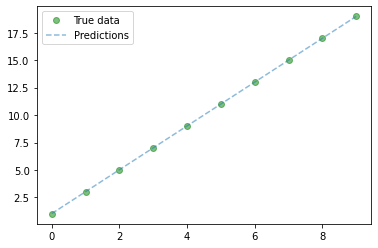

In [15]:
import matplotlib.pyplot as plt

with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()